In [90]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from bs4 import BeautifulSoup


In [91]:
prices_data = pd.read_csv("prices_data.csv")
house_features = pd.read_csv("house_features.csv")
metro_data = pd.read_csv("metro_data.csv")

merged_table = pd.read_csv("merged_table.csv")

In [92]:
prices_data.head()

,value,reportDate,prettyValue,realty_id
0,207595.0,2020-02-01,207 595 ₽/м²,1
1,220493.0,2020-03-01,220 493 ₽/м²,1
2,228764.0,2020-04-01,228 764 ₽/м²,1
3,228764.0,2020-05-01,228 764 ₽/м²,1
4,239315.0,2020-06-01,239 315 ₽/м²,1


In [93]:
house_features.head()

,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,Высота потолков,Газоснабжение,Отопление,Тип перекрытий,Подъездов,Количество лифтов,Мусоропроводов,Квартир,Реновация,Аварийность,Детская площадка,Спортивная площадка,Фонд капитального ремонта,realty_id
0,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,2.64,Отсутствует,Центральное,Другие,2.0,"4 пассажирских, 2 грузовых",2,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,1
1,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Монолитный,9,NaN,2.50,Центральное,Центральное,Железобетонные,4.0,4 пассажирских,4,144.0,Нет,Нет,Да,Да,На специальном счете у регионального оператора,2
2,"Москва, улица Обручева, 28К3",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1966,NaN,16,NaN,2.65,Отсутствует,Центральное,Железобетонные,1.0,"1 пассажирский, 1 грузовой",1,111.0,Нет,Нет,Нет,Нет,На счете регионального оператора,3
3,"Москва, улица Островитянова, 11",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1999,Панельный,17,П-3М,2.64,Отсутствует,Центральное,Железобетонные,5.0,"5 пассажирских, 5 грузовых",5,320.0,Нет,Нет,Нет,Да,На специальном счете у регионального оператора,4
4,"Москва, улица Академика Арцимовича, 20",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1968,Панельный,9,II-57,2.64,Центральное,Центральное,Железобетонные,7.0,7 пассажирских,7,251.0,Нет,Нет,Да,Да,На специальном счете у регионального оператора,5


In [94]:
metro_data.head(6)

,Станция,Расстояние (м),Тип транспорта,Время в пути (мин),realty_id
0,Университет Дружбы Народов,881.0,Пешком,11,1
1,Тропарёво,2957.0,На машине,4,1
2,Беляево,2370.0,На машине,5,1
3,Калужская,1311.0,Пешком,15,2
4,Университет Дружбы Народов,1297.0,Пешком,16,2
5,Воронцовская,1483.0,Пешком,17,2


In [95]:
merged_table.head()

,value,reportDate,prettyValue,realty_id,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,...,Квартир,Реновация,Аварийность,Детская площадка,Спортивная площадка,Фонд капитального ремонта,Расстояние до первой станции,Расстояние до второй станции,Название первой станции,Название второй станции
0,207595.0,2020-02-01,207 595 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,881.0,2370.0,Университет Дружбы Народов,Беляево
1,220493.0,2020-03-01,220 493 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,881.0,2370.0,Университет Дружбы Народов,Беляево
2,228764.0,2020-04-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,881.0,2370.0,Университет Дружбы Народов,Беляево
3,228764.0,2020-05-01,228 764 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,881.0,2370.0,Университет Дружбы Народов,Беляево
4,239315.0,2020-06-01,239 315 ₽/м²,1,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,...,166.0,Нет,Нет,Нет,Нет,На счете регионального оператора,881.0,2370.0,Университет Дружбы Народов,Беляево


In [96]:
merged_table.columns

Index(['value', 'reportDate', 'prettyValue', 'realty_id', 'Адрес', 'URL',
       'Год постройки', 'Тип дома', 'Этажность', 'Строительная серия',
       'Высота потолков', 'Газоснабжение', 'Отопление', 'Тип перекрытий',
       'Подъездов', 'Количество лифтов', 'Мусоропроводов', 'Квартир',
       'Реновация', 'Аварийность', 'Детская площадка', 'Спортивная площадка',
       'Фонд капитального ремонта', 'Расстояние до первой станции',
       'Расстояние до второй станции', 'Название первой станции',
       'Название второй станции'],
      dtype='object')

1 - 45 Университет Дружбы народов

46 - 69 Генерала Тюленева

70 - 91 Генерала Тюленева + Тютчевская

92 - Потапово

In [97]:
urls_prices = [
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697035&roomsCount=all&period=all", 
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=34441&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56706&roomsCount=all&period=all",        
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1699412&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1696612&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=66794&roomsCount=all&period=all",             ### - первая станция не тритмент
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all",                # - дубликат
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1704160&roomsCount=all&period=all",          
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1694758&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1728408&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=27554&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=27549&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58839&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56710&roomsCount=all&period=all",        
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71098&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=47492&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all",        
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=989953&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697035&roomsCount=all&period=all", 
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71097&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71098&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71099&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=3245139&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18007&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58805&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all",                
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1080888&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56706&roomsCount=all&period=all",            
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56705&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56710&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=47490&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18000&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17997&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=606455&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1701671&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17998&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=32592&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58801&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1711316&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58806&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=58795&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695695&roomsCount=all&period=all",
    #"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1704160&roomsCount=all&period=all",          
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18013&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79556&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79557&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1713733&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1715736&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1704699&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79567&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79561&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79525&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79570&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79569&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79572&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79539&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1703841&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1696643&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17957&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1715434&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17956&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1724532&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1703284&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695949&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1700137&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1781723&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=606384&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=17945&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1691421&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41145&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1702798&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1713741&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1695987&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41147&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79549&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79540&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79533&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79548&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79547&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=79545&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41159&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41162&roomsCount=all&period=all",
    ###"https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=41165&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1847202&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1803888&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1833802&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1873062&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1807554&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1864728&roomsCount=all&period=all",
    "https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1813861&roomsCount=all&period=all",

    ]

In [98]:
urls_house_info = [
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+6&totalArea=38.4&roomsCount=1&offerId=309089270&floor=floorOther&repairType=repairTypeDesign",                                                                                   
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C+2%D0%9A1&totalArea=60.0&roomsCount=3&offerId=311850058&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A3&totalArea=52.5&roomsCount=3&offerId=307635407&floor=floorOther&repairType=repairTypeWithout",                                                                                                       
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+11&totalArea=96.3&roomsCount=4&offerId=308499030&floor=floorOther&repairType=repairTypeCosmetic",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+20&totalArea=63.1&roomsCount=3&offerId=309831811&floor=floorOne&repairType=repairTypeDesign",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9F%D1%80%D0%BE%D1%84%D1%81%D0%BE%D1%8E%D0%B7%D0%BD%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C+96%D0%9A4&totalArea=32.0&roomsCount=1&offerId=311040447&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=33.0&roomsCount=1&offerId=307458577&floor=floorOther&repairType=repairTypeWithout",                                                              
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+5&totalArea=70.5&roomsCount=2&offerId=311731437&floor=floorOther&repairType=repairTypeEuro",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C+4&totalArea=58.0&roomsCount=2&offerId=311526699&floor=floorOther&repairType=repairTypeEuro",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%91%D0%B0%D0%BA%D1%83%D0%BB%D0%B5%D0%B2%D0%B0%2C+2&totalArea=53.0&roomsCount=2&offerId=312002808&floor=floorOther&repairType=repairTypeEuro",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9+%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C+150&totalArea=75.0&roomsCount=3&offerId=311108810&floor=floorOther&repairType=repairTypeEuro",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9+%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C+144%D0%9A5&totalArea=58.9&roomsCount=2&offerId=308360830&floor=floorOther&repairType=repairTypeEuro",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+23%D0%9A2&totalArea=58.9&roomsCount=3&offerId=310168643&floor=floorLast&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A7&totalArea=75.9&roomsCount=3&offerId=310793059&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A3&totalArea=81.1&roomsCount=3&offerId=309936581&floor=floorOne&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C+27%D0%9A1&totalArea=73.8&roomsCount=3&offerId=308129789&floor=floorOther&repairType=repairTypeWithout",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=63.5&roomsCount=3&offerId=311563032&floor=floorOther&repairType=repairTypeEuro",                                                 
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+8%D0%BA3&totalArea=58.0&roomsCount=2&offerId=309527570&floor=floorOther&repairType=repairTypeWithout",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+6&totalArea=38.4&roomsCount=1&offerId=307713412&floor=floorOther&repairType=repairTypeCosmetic",                                                                             
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A2&totalArea=79.5&roomsCount=3&offerId=309254865&floor=floorOther&repairType=repairTypeEuro",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A3&totalArea=81.1&roomsCount=3&offerId=309936581&floor=floorOne&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+4%D0%9A4&totalArea=55.2&roomsCount=2&offerId=308290049&floor=floorLast&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+2%D0%90&totalArea=120.0&roomsCount=3&offerId=309980787&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+23%D0%9A1&totalArea=60.0&roomsCount=3&offerId=306765780&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A4&totalArea=39.0&roomsCount=1&offerId=307912564&floor=floorLast&repairType=repairTypeEuro",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=33.0&roomsCount=1&offerId=307458577&floor=floorOther&repairType=repairTypeWithout",                                                      
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%BA6&totalArea=41.0&roomsCount=1&offerId=311945204&floor=floorOther&repairType=repairTypeEuro",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A3&totalArea=52.5&roomsCount=3&offerId=307635407&floor=floorOther&repairType=repairTypeWithout",                                                                                           
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A2&totalArea=71.6&roomsCount=4&offerId=311912659&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A7&totalArea=75.9&roomsCount=3&offerId=310793059&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F+%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C+25&totalArea=38.7&roomsCount=1&offerId=310270512&floor=floorLast&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A3&totalArea=66.4&roomsCount=3&offerId=311328806&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A1&totalArea=63.0&roomsCount=3&offerId=300302109&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+8%D0%90&totalArea=95.1&roomsCount=3&offerId=311908456&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+13&totalArea=45.3&roomsCount=2&offerId=307780981&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+15%D0%9A2&totalArea=45.0&roomsCount=2&offerId=299209036&floor=floorTwo&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+2%D0%9A1&totalArea=40.0&roomsCount=1&offerId=309589901&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A1&totalArea=52.5&roomsCount=1&offerId=308770205&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C+8&totalArea=45.8&roomsCount=2&offerId=311262176&floor=floorLast&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9%D0%9A5&totalArea=120.0&roomsCount=3&offerId=303870632&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+5%D0%9A3&totalArea=51.0&roomsCount=1&offerId=311125656&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+9&totalArea=66.6&roomsCount=2&offerId=311234104&floor=floorOther&repairType=repairTypeCosmetic",
    #"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C+5&totalArea=70.5&roomsCount=2&offerId=312077134&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+31%D0%9A2&totalArea=64.0&roomsCount=3&offerId=310639393&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A1&totalArea=75.0&roomsCount=3&offerId=303230896&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A2&totalArea=26.0&roomsCount=1&offerId=308076419&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+4&totalArea=50.6&roomsCount=2&offerId=310662654&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+8&totalArea=59.0&roomsCount=3&offerId=310505447&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+23&totalArea=36.8&roomsCount=1&offerId=311772311&floor=floorLast&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A1&totalArea=37.6&roomsCount=1&offerId=310947195&floor=floorLast&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+21%D0%9A5&totalArea=45.2&roomsCount=2&offerId=312120809&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+12%D0%9A1&totalArea=38.5&roomsCount=2&offerId=310625201&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A5&totalArea=45.0&roomsCount=2&offerId=308637655&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+25%D0%9A4&totalArea=62.0&roomsCount=3&offerId=288824068&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+27&totalArea=54.0&roomsCount=2&offerId=311120890&floor=floorLast&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+14%2F2&totalArea=44.4&roomsCount=2&offerId=301200222&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+5&totalArea=76.2&roomsCount=4&offerId=308144018&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+3&totalArea=60.8&roomsCount=3&offerId=302971287&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+4%D0%9A2&totalArea=40.0&roomsCount=2&offerId=310967629&floor=floorOther",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+6&totalArea=60.0&roomsCount=3&offerId=308397152&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+4%D0%9A1&totalArea=34.1&roomsCount=1&offerId=305930485&floor=floorOne&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+12&totalArea=50.8&roomsCount=2&offerId=304858455&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C+1&totalArea=102.2&roomsCount=3&offerId=311371966&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+6&totalArea=45.2&roomsCount=2&offerId=308908363&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+2&totalArea=32.5&roomsCount=1&offerId=312295732&floor=floorOne&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+8&totalArea=65.6&roomsCount=3&offerId=312454781&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+28&totalArea=32.6&roomsCount=1&offerId=307775309&floor=floorOther&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C+36&totalArea=73.4&roomsCount=3&offerId=311208660&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+11&totalArea=64.0&roomsCount=3&offerId=310743428&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+7%D0%9A1&totalArea=61.0&roomsCount=3&offerId=311126074&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+13&totalArea=68.0&roomsCount=3&offerId=304856437&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+15&totalArea=51.3&roomsCount=2&offerId=311160192&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+17&totalArea=51.0&roomsCount=2&offerId=302404390&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+7%D0%9A2&totalArea=34.7&roomsCount=1&offerId=308231609&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A7&totalArea=52.0&roomsCount=2&offerId=309113077&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A1&totalArea=63.5&roomsCount=2&offerId=301855337&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+13%D0%9A1&totalArea=58.8&roomsCount=2&offerId=308746096&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A6&totalArea=51.5&roomsCount=2&offerId=309117903&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A5&totalArea=61.5&roomsCount=3&offerId=294319016&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9+%D0%A1%D1%82%D0%B0%D0%BD%2C+15%D0%9A4&totalArea=34.8&roomsCount=1&offerId=312464277&floor=floorOne&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+25&totalArea=51.5&roomsCount=2&offerId=309890288&floor=floorOther&repairType=repairTypeCosmetic",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+27&totalArea=51.0&roomsCount=2&offerId=312472389&floor=floorTwo&repairType=repairTypeWithout",
    ###"https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0+%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C+29%D0%9A2&totalArea=40.0&roomsCount=1&offerId=311777987&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+1&totalArea=67.4&roomsCount=2&offerId=309636118&floor=floorOther&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%93%D0%B5%D1%80%D0%BE%D1%8F+%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8+%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C+18&totalArea=50.5&roomsCount=1&offerId=310314749&floor=floorTwo&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+35&totalArea=54.0&roomsCount=1&offerId=312231467&floor=floorTwo&repairType=repairTypeDesign",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+31&totalArea=44.9&roomsCount=2&offerId=308567781&floor=floorOther&repairType=repairTypeWithout",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+33&totalArea=51.4&roomsCount=2&offerId=303243667&floor=floorOther&repairType=repairTypeEuro",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+28&totalArea=33.3&roomsCount=1&offerId=307890576&floor=floorTwo&repairType=repairTypeCosmetic",
    "https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D0%BF%D0%BE%D1%81.+%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0+%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C+29&totalArea=33.9&roomsCount=1&offerId=311586464&floor=floorOther&repairType=repairTypeWithout",
    
]   

In [99]:
urls_metro = [
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%206",                                                            
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C%202%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A3",                                                                                   
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%2011",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%2020",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9F%D1%80%D0%BE%D1%84%D1%81%D0%BE%D1%8E%D0%B7%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2096%D0%9A4", 
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A1",                                        
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%205",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C%204",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%91%D0%B0%D0%BA%D1%83%D0%BB%D0%B5%D0%B2%D0%B0%2C%202",
   ### "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C%20150",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C%20144%D0%9A5",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%2023%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2027%D0%9A1",
   # "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A1",                                
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%208%D0%BA3",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%206",                                                                
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A2",
   # "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%204%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%202%D0%90",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2023%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A4",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A1",                            
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%BA6",
    #"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A3",                                                                               
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A2",
   # "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%9C%D0%B8%D0%BA%D0%BB%D1%83%D1%85%D0%BE-%D0%9C%D0%B0%D0%BA%D0%BB%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2025",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%208%D0%90",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2013",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2015%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%202%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%90%D1%80%D1%86%D0%B8%D0%BC%D0%BE%D0%B2%D0%B8%D1%87%D0%B0%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%205%D0%9A3",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%209",
   # "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B8%D1%82%D1%8F%D0%BD%D0%BE%D0%B2%D0%B0%2C%205",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2031%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%204",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2023",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2021%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2012%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2025%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2027",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2014%2F2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%205",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%203",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%204%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%206",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%204%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%2012",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B8%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%D0%BE%D0%B2%D0%B0%2C%201",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%206",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%202",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%208",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%2028",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%B0%D1%80%D0%B3%D0%B8%2C%2036",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2011",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%207%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2013",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2015",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2017",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%207%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A7",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2013%D0%9A1",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A6",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A5",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A2%D0%B5%D0%BF%D0%BB%D1%8B%D0%B9%20%D0%A1%D1%82%D0%B0%D0%BD%2C%2015%D0%9A4",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2025",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2027",
    ###"https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D0%B0%20%D0%A2%D1%8E%D0%BB%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0%2C%2029%D0%9A2",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%201",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%93%D0%B5%D1%80%D0%BE%D1%8F%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8%20%D0%A1%D0%BE%D0%BB%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%BD%D0%B0%2C%2018",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2035",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2031",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2033",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2028",
    "https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D0%BF%D0%BE%D1%81.%20%D0%97%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0%20%D0%9C%D0%BE%D1%81%D1%80%D0%B5%D0%BD%D1%82%D0%B3%D0%B5%D0%BD%2C%2029",

]

In [100]:


# Словарь для хранения индексов повторяющихся элементов
repeated_indices = {}

for idx, value in enumerate(urls_prices):
    if urls_prices.count(value) > 1:
        repeated_indices.setdefault(value, []).append(idx)

print(repeated_indices)  # {1: [0, 7, 9], 2: [1, 4], 3: [2, 5]}


{}


## Парсим цены

In [101]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

all_data = []

def fetch_and_process_url(url, realty_id):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            data = response.json()  
            if 'houseTrand' in data:
                trend_data = pd.DataFrame(data['houseTrand'])
                trend_data['value'] = trend_data['value'].astype(float)
                trend_data['reportDate'] = pd.to_datetime(trend_data['reportDate'])
                trend_data['realty_id'] = realty_id 
                return trend_data
            else:
                print(f"Ключ 'houseTrand' отсутствует в ответе для {url}")
        else:
            print(f"Ошибка {response.status_code} при запросе {url}")
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
    return None

for idx, url in enumerate(urls_prices, start=1):
    print(f"Обработка ссылки {idx}/{len(urls_prices)}: {url}")
    trend_data = fetch_and_process_url(url, realty_id=idx)
    if trend_data is not None:
        all_data.append(trend_data)
    
    pause = random.uniform(20, 25)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)

if all_data:
    prices_data = pd.concat(all_data, ignore_index=True)
    prices_data

Обработка ссылки 1/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=1697035&roomsCount=all&period=all
Пауза 23.00 секунд...
Обработка ссылки 2/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=34441&roomsCount=all&period=all
Пауза 23.58 секунд...
Обработка ссылки 3/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56706&roomsCount=all&period=all
Пауза 22.66 секунд...
Обработка ссылки 4/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=18008&roomsCount=all&period=all
Пауза 20.76 секунд...
Обработка ссылки 5/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=56710&roomsCount=all&period=all
Пауза 20.89 секунд...
Обработка ссылки 6/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?realtyId=71098&roomsCount=all&period=all
Пауза 24.12 секунд...
Обработка ссылки 7/73: https://api.cian.ru/valuation-offer-history/v1/get-market-trand/?real

In [102]:
prices_data.head()

,value,reportDate,prettyValue,realty_id
0,207595.0,2020-02-01,207 595 ₽/м²,1
1,220493.0,2020-03-01,220 493 ₽/м²,1
2,228764.0,2020-04-01,228 764 ₽/м²,1
3,228764.0,2020-05-01,228 764 ₽/м²,1
4,239315.0,2020-06-01,239 315 ₽/м²,1


In [103]:
prices_data.to_csv("prices_data.csv", index=False)

<hr>

## Парсим характеристики дома

In [104]:
columns = [
    "realty_id", "Адрес", "Год постройки", "Тип дома", "Этажность", "Строительная серия", "Высота потолков",
    "Газоснабжение", "Отопление", "Тип перекрытий", "Подъездов", "Количество лифтов",
    "Мусоропроводов", "Квартир", "Реновация", "Аварийность", "Детская площадка",
    "Спортивная площадка", "Фонд капитального ремонта", "URL"
]
data_house_features = pd.DataFrame(columns=columns)


def parse_page(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            print(f"Ошибка загрузки страницы: {response.status_code} для {url}")
            return None

        soup = BeautifulSoup(response.text, "html.parser")


        address_block = soup.find("span", class_="f0b5faa8cb--color_gray60_100--mYFjS")
        address = address_block.text.strip() if address_block else "Адрес не найден"

        name_blocks = soup.find_all("div", class_="f0b5faa8cb--name--vfsqB")
        value_blocks = soup.find_all("div", class_="f0b5faa8cb--val--YiBYQ")

        if len(name_blocks) == len(value_blocks):
            data = {"Адрес": address, "URL": url}  
            for name, value in zip(name_blocks, value_blocks):
                key = name.text.strip()
                val = value.text.strip()
                data[key] = val
            return data
        else:
            print(f"Количество названий и значений не совпадает для {url}.")
            return None
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
        return None


parsed_data_list = []
for idx, url in enumerate(urls_house_info, start=1): 
    print(f"Обработка {idx}/{len(urls_house_info)}: {url}")
    parsed_data = parse_page(url)
    if parsed_data:
        parsed_data["realty_id"] = idx  
        
        for col in columns:
            if col not in parsed_data:
                parsed_data[col] = None
        parsed_data_list.append(parsed_data)
    
   
    pause = random.uniform(20, 25)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)


if parsed_data_list:
    data_house_features = pd.concat([pd.DataFrame([data]) for data in parsed_data_list], ignore_index=True)
    print("Данные успешно собраны.")
else:
    print("Нет данных для объединения.")

Обработка 1/73: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B+%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C+6&totalArea=38.4&roomsCount=1&offerId=309089270&floor=floorOther&repairType=repairTypeDesign
Пауза 20.64 секунд...


Обработка 2/73: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C+2%D0%9A1&totalArea=60.0&roomsCount=3&offerId=311850058&floor=floorOther&repairType=repairTypeDesign
Пауза 24.60 секунд...
Обработка 3/73: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C+28%D0%9A3&totalArea=52.5&roomsCount=3&offerId=307635407&floor=floorOther&repairType=repairTypeWithout
Пауза 23.55 секунд...
Обработка 4/73: https://www.cian.ru/kalkulator-nedvizhimosti/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C+%D1%83%D0%BB%D0%B8%D1%86%D0%B0+%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0+%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C+25%D0%9A1&totalArea=33.0&roomsCount=1&offerId=307458577&floor=floorOther&repairType=repairTypeWithout
Пауза 22.31 секунд

In [105]:
data_house_features.head()

,Адрес,URL,Год постройки,Тип дома,Этажность,Строительная серия,Высота потолков,Газоснабжение,Отопление,Тип перекрытий,Подъездов,Количество лифтов,Мусоропроводов,Квартир,Реновация,Аварийность,Детская площадка,Спортивная площадка,Фонд капитального ремонта,realty_id
0,"Москва, улица Саморы Машела, 6",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2003,Панельный,22,КОПЭ,2.64,Отсутствует,Центральное,Другие,2,"4 пассажирских, 2 грузовых",2,166,Нет,Нет,Нет,Нет,На счете регионального оператора,1
1,"Москва, улица Бутлерова, 2К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1967,Панельный,9,None,2.5,Центральное,Центральное,Железобетонные,4,4 пассажирских,4,144,Нет,Нет,Да,Да,На специальном счете у регионального оператора,2
2,"Москва, улица Обручева, 28К3",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1966,None,16,None,2.65,Отсутствует,Центральное,Железобетонные,1,"1 пассажирский, 1 грузовой",1,111,Нет,Нет,Нет,Нет,На счете регионального оператора,3
3,"Москва, улица Академика Волгина, 25К1",https://www.cian.ru/kalkulator-nedvizhimosti/?...,1970,Панельный,9,II-57,2.64,Центральное,Центральное,Железобетонные,5,5 пассажирских,45,160,Нет,Нет,Да,Да,На специальном счете у регионального оператора,4
4,"Москва, улица Обручева, 28К7",https://www.cian.ru/kalkulator-nedvizhimosti/?...,2005,Панельный,17,П-44,2.75,Отсутствует,Центральное,Другие,3,"3 пассажирских, 3 грузовых",3,195,Нет,Нет,Нет,Нет,На счете регионального оператора,5


In [106]:
data_house_features.to_csv("house_features.csv", index=False)

## Парсим расстояние до метро

In [107]:

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

all_metro_data = []


def fetch_and_process_metro(url, realty_id):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            data = response.json()  
            if 'metro' in data:  
                metro_list = data['metro']
                metro_data = []
                for metro in metro_list:
                    metro_data.append({
                        "Станция": metro["name"],
                        "Расстояние (м)": metro["distance"],
                        "Тип транспорта": "Пешком" if metro["travelType"] == "byFoot" else "На машине",
                        "Время в пути (мин)": metro["travelTime"],
                        "realty_id": realty_id
                    })
                return pd.DataFrame(metro_data)
            else:
                print(f"Ключ 'metro' отсутствует в ответе для {url}")
        else:
            print(f"Ошибка {response.status_code} при запросе {url}")
    except requests.RequestException as e:
        print(f"Ошибка при запросе {url}: {e}")
    return None

for idx, url in enumerate(urls_metro, start=1):
    print(f"Обработка ссылки {idx}/{len(urls_metro)}: {url}")
    metro_data = fetch_and_process_metro(url, realty_id=idx)
    if metro_data is not None:
        all_metro_data.append(metro_data)
    
    
    pause = random.uniform(20, 25)
    print(f"Пауза {pause:.2f} секунд...")
    time.sleep(pause)


if all_metro_data:
    metro_data = pd.concat(all_metro_data, ignore_index=True)
    print("Данные о метро успешно собраны.")
else:
    metro_data = pd.DataFrame()  
    print("Нет данных для объединения.")

print(metro_data)


Обработка ссылки 1/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%A1%D0%B0%D0%BC%D0%BE%D1%80%D1%8B%20%D0%9C%D0%B0%D1%88%D0%B5%D0%BB%D0%B0%2C%206
Пауза 23.96 секунд...
Обработка ссылки 2/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%91%D1%83%D1%82%D0%BB%D0%B5%D1%80%D0%BE%D0%B2%D0%B0%2C%202%D0%9A1
Пауза 22.89 секунд...


Обработка ссылки 3/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A3
Пауза 20.38 секунд...
Обработка ссылки 4/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%90%D0%BA%D0%B0%D0%B4%D0%B5%D0%BC%D0%B8%D0%BA%D0%B0%20%D0%92%D0%BE%D0%BB%D0%B3%D0%B8%D0%BD%D0%B0%2C%2025%D0%9A1
Пауза 22.03 секунд...
Обработка ссылки 5/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9E%D0%B1%D1%80%D1%83%D1%87%D0%B5%D0%B2%D0%B0%2C%2028%D0%9A7
Пауза 22.78 секунд...
Обработка ссылки 6/73: https://api.cian.ru/price-estimator/v2/get-infrastructure-nearby-block/?address=%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0%2C%20%D1%83%D0%BB

In [108]:
metro_data.to_csv("metro_data.csv", index=False)

In [109]:
# Группируем по realty_id и выбираем 3 ближайшие станции
nearest_stations = (
    metro_data.sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .head(3)  # Берем три ближайшие станции
    .reset_index(drop=True)
)

# Преобразуем данные в нужный формат
result = nearest_stations.pivot_table(
    index="realty_id",
    values=["Расстояние (м)", "Станция"],
    aggfunc=lambda x: list(x)[:3]  # Берем значения для трёх ближайших станций
).reset_index()

# Разделяем расстояния и названия станций по столбцам
result[["Расстояние до первой станции", "Расстояние до второй станции", "Расстояние до третьей станции"]] = pd.DataFrame(result["Расстояние (м)"].tolist(), index=result.index)
result[["Название первой станции", "Название второй станции", "Название третьей станции"]] = pd.DataFrame(result["Станция"].tolist(), index=result.index)

# Убираем лишние столбцы
result = result.drop(columns=["Расстояние (м)", "Станция"])

# Задаем список станций для исключения
excluded_stations = ["Университет Дружбы Народов", "Тютчевская", "Генерала Тюленева"]

# Находим ближайшую станцию для каждого объекта
nearest_station = (
    metro_data.sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .first()
    .reset_index()
    .rename(columns={"Расстояние (м)": "Ближайшая станция после тритмента расстояние", "Станция": "Ближайшая станция после тритмента"})
)

# Находим ближайшую станцию, которая не входит в исключения
filtered_stations = (
    metro_data[~metro_data["Станция"].isin(excluded_stations)]
    .sort_values(by=["realty_id", "Расстояние (м)"])
    .groupby("realty_id")
    .first()
    .reset_index()
    .rename(columns={"Расстояние (м)": "Ближайшая станция до тритмента расстояние", 
                     "Станция": "Ближайшая станция до тритмента"})
)

# Объединяем с данными о трёх ближайших станциях
result = result.merge(nearest_station[["realty_id", "Ближайшая станция после тритмента расстояние", "Ближайшая станция после тритмента"]], on="realty_id", how="left")
result = result.merge(filtered_stations[["realty_id", "Ближайшая станция до тритмента расстояние", "Ближайшая станция до тритмента"]], on="realty_id", how="left")

# Считаем разницу расстояний
result["Сокращение расстояния"] = (
    result["Ближайшая станция до тритмента расстояние"] - result["Ближайшая станция после тритмента расстояние"]
)

result.head()


,realty_id,Расстояние до первой станции,Расстояние до второй станции,Расстояние до третьей станции,Название первой станции,Название второй станции,Название третьей станции,Ближайшая станция после тритмента расстояние,Ближайшая станция после тритмента,Ближайшая станция до тритмента расстояние,Ближайшая станция до тритмента,Сокращение расстояния
0,1,881.0,2370.0,2957.0,Университет Дружбы Народов,Беляево,Тропарёво,881.0,Университет Дружбы Народов,2370.0,Беляево,1489.0
1,2,1297.0,1311.0,1483.0,Университет Дружбы Народов,Калужская,Воронцовская,1297.0,Университет Дружбы Народов,1311.0,Калужская,14.0
2,3,978.0,1816.0,2680.0,Университет Дружбы Народов,Воронцовская,Новаторская,978.0,Университет Дружбы Народов,1816.0,Воронцовская,838.0
3,4,930.0,1169.0,1450.0,Университет Дружбы Народов,Беляево,Коньково,930.0,Университет Дружбы Народов,1169.0,Беляево,239.0
4,5,1060.0,1542.0,1752.0,Университет Дружбы Народов,Калужская,Воронцовская,1060.0,Университет Дружбы Народов,1542.0,Калужская,482.0


In [110]:
merged_table = prices_data.merge(data_house_features, on='realty_id', how='left').merge(result, on='realty_id', how='left')

In [111]:
merged_table.to_csv("merged_table.csv", index=False)

In [112]:
merged_table = pd.read_csv("merged_table.csv")

In [115]:
merged_table.columns

Index(['value', 'reportDate', 'prettyValue', 'realty_id', 'Адрес', 'URL',
       'Год постройки', 'Тип дома', 'Этажность', 'Строительная серия',
       'Высота потолков', 'Газоснабжение', 'Отопление', 'Тип перекрытий',
       'Подъездов', 'Количество лифтов', 'Мусоропроводов', 'Квартир',
       'Реновация', 'Аварийность', 'Детская площадка', 'Спортивная площадка',
       'Фонд капитального ремонта', 'Расстояние до первой станции',
       'Расстояние до второй станции', 'Расстояние до третьей станции',
       'Название первой станции', 'Название второй станции',
       'Название третьей станции',
       'Ближайшая станция после тритмента расстояние',
       'Ближайшая станция после тритмента',
       'Ближайшая станция до тритмента расстояние',
       'Ближайшая станция до тритмента', 'Сокращение расстояния'],
      dtype='object')

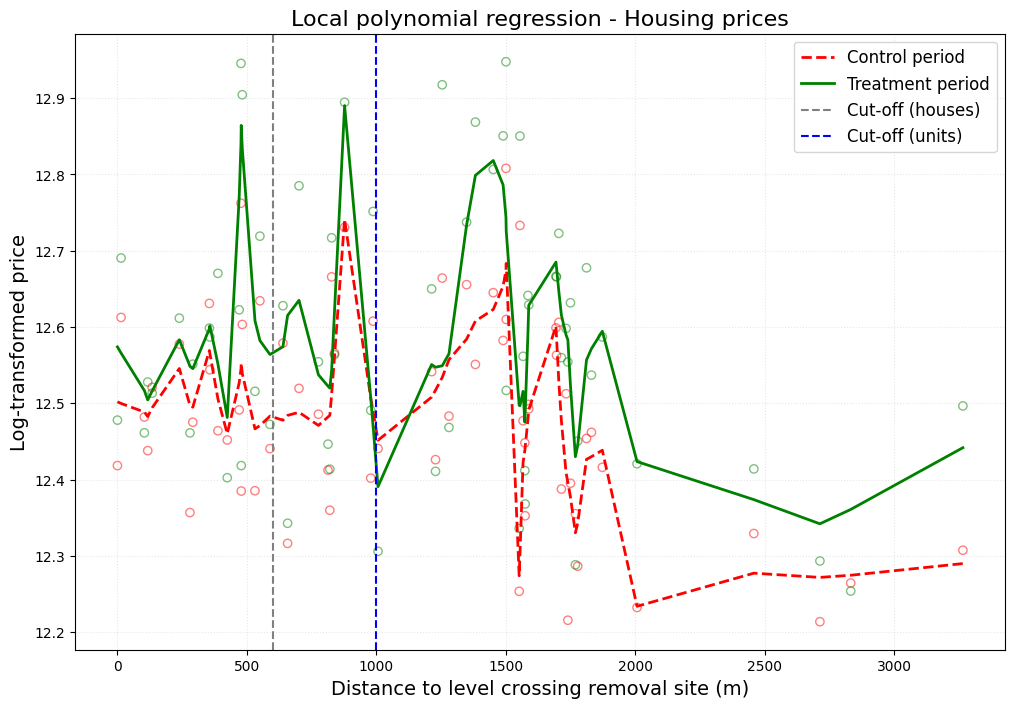

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Шаг 1. Подготовка данных
lpr = pd.DataFrame()
lpr["value"] = merged_table["value"]  # Цены
lpr["distance"] = merged_table["Сокращение расстояния"]  # Расстояние до станции
lpr["reportDate"] = pd.to_datetime(merged_table["reportDate"])  # Дата

# Логарифмирование цен
lpr["log_value"] = np.log(lpr["value"])

# Определение контрольного и тритмент-периодов
lpr["treatment"] = (lpr["reportDate"] >= pd.to_datetime('2024-09-01')).astype(int)

# Шаг 2. Агрегация данных
lpr_new = lpr.groupby(["treatment", "distance"])["log_value"].median().reset_index()

# Шаг 3. Применение локальной полиномиальной регрессии (LOWESS)
# Разделение данных на контрольный и тритмент-периоды
control = lpr_new[lpr_new["treatment"] == 0]
treatment = lpr_new[lpr_new["treatment"] == 1]

# LOWESS сглаживание
lowess_control = lowess(control["log_value"], control["distance"], frac=0.1)  # bandwidth ~50
lowess_treatment = lowess(treatment["log_value"], treatment["distance"], frac=0.1)

# Шаг 4. Построение графика
plt.figure(figsize=(12, 8))

# Контрольный период
plt.plot(lowess_control[:, 0], lowess_control[:, 1], color='red', label='Control period', linestyle='--', linewidth=2)
plt.scatter(control["distance"], control["log_value"], 
            color='none', edgecolor='red', alpha=0.5, label='_nolegend_')

# Тритмент-период
plt.plot(lowess_treatment[:, 0], lowess_treatment[:, 1], color='green', label='Treatment period', linestyle='-', linewidth=2)
plt.scatter(treatment["distance"], treatment["log_value"], 
            color='none', edgecolor='green', alpha=0.5, label='_nolegend_')

# Добавление линий cut-off
plt.axvline(x=600, color='gray', linestyle='--', label='Cut-off (houses)')
plt.axvline(x=1000, color='blue', linestyle='--', label='Cut-off (units)')

# Оформление графика
plt.xlabel('Distance to level crossing removal site (m)', fontsize=14)
plt.ylabel('Log-transformed price', fontsize=14)
plt.title('Local polynomial regression - Housing prices', fontsize=16)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3, linestyle=':')

# Показ графика
plt.show()
